In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def average_brightness(image, left_border, right_border, bottom_border, top_border):
    if right_border < left_border or top_border < bottom_border:
        raise Exception("Wrong borders!")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cropped_gray_image = gray_image[bottom_border:top_border, left_border:right_border]
    h, w = cropped_gray_image.shape
    denominator = h * w
    nominator = 0
    for i in range(h):
        for k in range(w):
            nominator += cropped_gray_image[i, k]
    return nominator / denominator

In [3]:
left_border = 40
right_border = 1240
bottom_border = 10
top_border = 710
data_dir = "dd/"
ev = []
avg_brightness = []
for filename in os.listdir(data_dir):
    print(f"process {filename}")
    ev.append(int(filename[filename.find("ev") + 2: -len(".jpg")]))
    image = cv2.imread(data_dir + filename)
    avg_brightness.append(average_brightness(image, left_border, right_border, bottom_border, top_border))

[ev, avg_brightness]

process ev-1.jpg
process ev-10.jpg
process ev-2.jpg
process ev-3.jpg
process ev-4.jpg
process ev-5.jpg
process ev-6.jpg
process ev-7.jpg
process ev-8.jpg
process ev-9.jpg
process ev0.jpg
process ev1.jpg
process ev10.jpg
process ev2.jpg
process ev3.jpg
process ev4.jpg
process ev5.jpg
process ev6.jpg
process ev7.jpg
process ev8.jpg
process ev9.jpg


[[-1, -10, -2, -3, -4, -5, -6, -7, -8, -9, 0, 1, 10, 2, 3, 4, 5, 6, 7, 8, 9],
 [115.65876428571428,
  79.46582380952381,
  111.76109523809524,
  106.8041,
  103.22899285714286,
  99.41521547619048,
  94.97720238095238,
  87.4888130952381,
  87.46801666666667,
  78.94880952380953,
  115.64782857142858,
  119.97896666666666,
  161.49737976190477,
  119.89076904761905,
  137.36369642857142,
  137.05274523809524,
  139.98225952380952,
  153.5371,
  148.56465833333334,
  154.6227392857143,
  157.78045]]

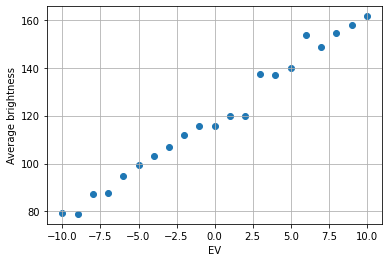

In [4]:
plt.scatter(ev, avg_brightness)
plt.xlabel("EV")
plt.ylabel("Average brightness")
plt.grid()

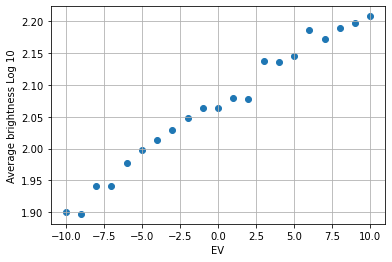

In [5]:
plt.scatter(ev, np.log10(avg_brightness))
plt.xlabel("EV")
plt.ylabel("Average brightness Log 10")
plt.grid()